# **Importing all required libraries**

In [6]:
!pip install --force-reinstall gensim nltk

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.0 MB/s eta 0:00:00
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.7 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 28.7 MB/s eta 0:00:00
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 6.3 MB/s eta 0:00:00
   ━━━

In [19]:
 !pip install spacy
 !python -m spacy download en_core_web_sm

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload 

In [2]:
import nltk

nltk.data.path.clear()  # Clear cached paths
nltk.download('punkt', force=True)  # Force re
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from collections import defaultdict
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
import pandas as pd
import numpy as np
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

# **Importing the data**

In [9]:
file_path = "/content/medical_abstract_data.csv"
raw_df = pd.read_csv(file_path)

# Create a mapping dictionary
condition_mapping = {
    1: 'neoplasms',
    2: 'digestive system diseases',
    3: 'nervous system diseases',
    4: 'cardiovascular diseases',
    5: 'general pathological conditions'
}

# Add a new column 'condition_name' based on 'condition_label'
raw_df['condition_name'] = raw_df['condition_label'].map(condition_mapping)

raw_df.head()

,condition_label,medical_abstract,condition_name
0,5,Tissue changes around loose prostheses. A cani...,general pathological conditions
1,1,Neuropeptide Y and neuron-specific enolase lev...,neoplasms
2,2,"Sexually transmitted diseases of the colon, re...",digestive system diseases
3,1,Lipolytic factors associated with murine and h...,neoplasms
4,3,Does carotid restenosis predict an increased r...,nervous system diseases


### **Exploratory Data Analysis**

In [6]:
print(raw_df['medical_abstract'].iloc[0])

Tissue changes around loose prostheses. A canine model to investigate the effects of an antiinflammatory agent. The aseptically loosened prosthesis provided a means for investigating the in vivo and in vitro activity of the cells associated with the loosening process in seven dogs. The cells were isolated and maintained in culture for sufficient periods of time so that their biologic activity could be studied as well as the effect of different agents added to the cells in vivo or in vitro. The biologic response as determined by interleukin-1 and prostaglandin E2 activity paralleled the roentgenographic appearance of loosening and the technetium images and observations made at the time of revision surgery. The correlation between clinical, roentgenographic, histologic, and biochemical loosening indicates that the canine model is suitable for investigating the mechanisms of prosthetic failure. A canine model permits the study of possible nonsurgical therapeutic interventions with the ult

In [7]:
# Initial data information
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11550 entries, 0 to 11549
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   condition_label   11550 non-null  int64 
 1   medical_abstract  11550 non-null  object
dtypes: int64(1), object(1)
memory usage: 180.6+ KB


In [8]:
# Initial Data Summary
raw_df.describe()

,condition_label
count,11550.000000
mean,3.335411
std,1.552404
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


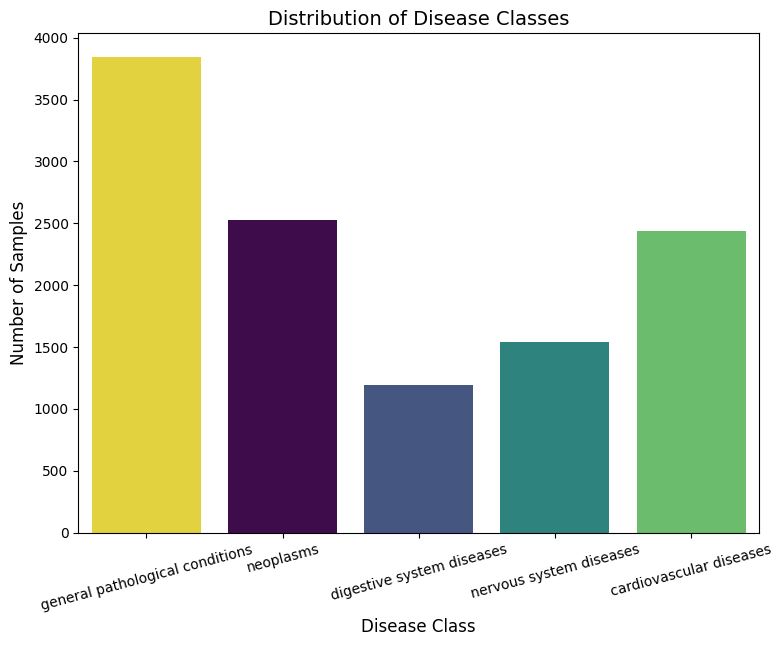

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=raw_df, x='condition_name', hue='condition_label', palette='viridis', legend=False)

plt.title("Distribution of Disease Classes", fontsize=14)
plt.xlabel("Disease Class", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.tight_layout()
plt.xticks(rotation=15)
plt.show()


### **Data Cleaning**

In [16]:
raw_df.isnull().sum()

,0
condition_label,0
medical_abstract,0
condition_name,0


### **Transforming Abstract Column**

In [17]:
print(f"before lowercasing: \n{raw_df['medical_abstract'].head()}")

before lowercasing: 
0    Tissue changes around loose prostheses. A cani...
1    Neuropeptide Y and neuron-specific enolase lev...
2    Sexually transmitted diseases of the colon, re...
3    Lipolytic factors associated with murine and h...
4    Does carotid restenosis predict an increased r...
Name: medical_abstract, dtype: object


In [18]:
raw_df['medical_abstract'] = raw_df['medical_abstract'].str.lower()


print(f"After: \n{raw_df['medical_abstract'].head()}")

After: 
0    tissue changes around loose prostheses. a cani...
1    neuropeptide y and neuron-specific enolase lev...
2    sexually transmitted diseases of the colon, re...
3    lipolytic factors associated with murine and h...
4    does carotid restenosis predict an increased r...
Name: medical_abstract, dtype: object


### **Tokenization**

In [29]:
import en_core_web_sm
nlp_processor = en_core_web_sm.load()

# return a list of tokens
def pre_processing_by_spacy(doc, lemma = True, need_sent = False):
  doc_class = nlp_processor(doc)
  tokens = []
  # step 1: get sentences
  for sent in doc_class.sents:
    # step 2: get tokens
    # step 3 (optional): lemma
    if lemma:
      words = [token.lemma_ for token in sent]
    else:
      words = [token.text for token in sent]
    if need_sent:
      tokens.append(words)
    else:
      tokens += words
  return tokens

def remove_stopwords_nested(nested_tokens):
    return [
        [token for token in sentence if not nlp_processor.vocab[token].is_stop]
        for sentence in nested_tokens
    ]


In [26]:
sample_text = "good better best"
pre_processing_by_spacy(sample_text)

['good', 'well', 'well']

In [28]:
tokens_list = []

for idx, row in raw_df.iterrows():
    abstract = row['medical_abstract']
    tokens = pre_processing_by_spacy(abstract, need_sent=True)  # or False
    tokens_list.append(tokens)

raw_df['tokens'] = tokens_list


NameError: name 'remove_stopwords_nested' is not defined

In [31]:
raw_df['tokens_without_stopwords'] = raw_df['tokens'].apply(remove_stopwords_nested)
raw_df['tokens_without_stopwords_string'] = raw_df['tokens_without_stopwords'].apply(lambda sents: ' '.join([word for sent in sents for word in sent]))


In [32]:
raw_df.head()

,condition_label,medical_abstract,condition_name,tokens,tokens_without_stopwords,tokens_without_stopwords_string
0,5,tissue changes around loose prostheses. a cani...,general pathological conditions,"[[tissue, change, around, loose, prosthesis, ....","[[tissue, change, loose, prosthesis, .], [cani...",tissue change loose prosthesis . canine model ...
1,1,neuropeptide y and neuron-specific enolase lev...,neoplasms,"[[neuropeptide, y, and, neuron, -, specific, e...","[[neuropeptide, y, neuron, -, specific, enolas...",neuropeptide y neuron - specific enolase level...
2,2,"sexually transmitted diseases of the colon, re...",digestive system diseases,"[[sexually, transmit, disease, of, the, colon,...","[[sexually, transmit, disease, colon, ,, rectu...","sexually transmit disease colon , rectum , anu..."
3,1,lipolytic factors associated with murine and h...,neoplasms,"[[lipolytic, factor, associate, with, murine, ...","[[lipolytic, factor, associate, murine, human,...",lipolytic factor associate murine human cancer...
4,3,does carotid restenosis predict an increased r...,nervous system diseases,"[[do, carotid, restenosis, predict, an, increa...","[[carotid, restenosis, predict, increase, risk...",carotid restenosis predict increase risk late ...


In [33]:
raw_df.to_csv('preprocessed_medical_abstracts.csv', index=False)

### **Model Comparison**

In [34]:
raw_df['condition_label'].value_counts()

,count
condition_label,
5,3844
1,2530
4,2441
3,1540
2,1195


In [35]:
# Label encoding
le = LabelEncoder()
raw_df['label_enc'] = le.fit_transform(raw_df['condition_label'])

In [36]:
# built medical corpus
medical_corpus = raw_df["tokens_without_stopwords_string"].apply(lambda x: x.split()).tolist()


In [37]:
medical_corpus[:1]

[['tissue',
  'change',
  'loose',
  'prosthesis',
  '.',
  'canine',
  'model',
  'investigate',
  'effect',
  'antiinflammatory',
  'agent',
  '.',
  'aseptically',
  'loosen',
  'prosthesis',
  'provide',
  'means',
  'investigate',
  'vivo',
  'vitro',
  'activity',
  'cell',
  'associate',
  'loosening',
  'process',
  'seven',
  'dog',
  '.',
  'cell',
  'isolate',
  'maintain',
  'culture',
  'sufficient',
  'period',
  'time',
  'biologic',
  'activity',
  'study',
  'effect',
  'different',
  'agent',
  'add',
  'cell',
  'vivo',
  'vitro',
  '.',
  'biologic',
  'response',
  'determine',
  'interleukin-1',
  'prostaglandin',
  'e2',
  'activity',
  'parallel',
  'roentgenographic',
  'appearance',
  'loosening',
  'technetium',
  'image',
  'observation',
  'time',
  'revision',
  'surgery',
  '.',
  'correlation',
  'clinical',
  ',',
  'roentgenographic',
  ',',
  'histologic',
  ',',
  'biochemical',
  'loosening',
  'indicate',
  'canine',
  'model',
  'suitable',
  'inv

In [38]:
raw_df['tokens_without_stopwords_string'][:5]

,tokens_without_stopwords_string
0,tissue change loose prosthesis . canine model ...
1,neuropeptide y neuron - specific enolase level...
2,"sexually transmit disease colon , rectum , anu..."
3,lipolytic factor associate murine human cancer...
4,carotid restenosis predict increase risk late ...


In [40]:
len(raw_df['tokens_without_stopwords_string'][0])

767

### **Word2Vec**

In [41]:
from gensim.models import Word2Vec

# word2vec model trained on CBOW with window=5
model = Word2Vec(
    sentences=medical_corpus,
    vector_size=100,     # dimensionality of word embeddings
    window=5,            # context window size
    min_count=2,         # ignore words with total frequency < 2
    workers=4,           # number of parallel threads
    sg=0                 # 0 = CBOW, 1 = Skip-gram
)



### **Doc2Vec**

In [43]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# each item in medical_corpus is a list of tokens from one document
tagged_data = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(medical_corpus)]

doc_model = Doc2Vec(
    vector_size=100,    # size of document vectors
    window=10,          # context window size for word context
    min_count=2,        # ignore words appearing < 2 times
    workers=4,          # use 4 threads
    epochs=40,          # train over data 40 times
    dm=1                # 1 = PV-DM (Distributed Memory), 0 = PV-DBOW
)


doc_model.build_vocab(tagged_data)
doc_model.train(tagged_data, total_examples=doc_model.corpus_count, epochs=doc_model.epochs)
raw_df['doc2vec_embedding'] = [doc_model.infer_vector(doc) for doc in medical_corpus]

### **Mean Vector from Word2Vec**

In [45]:
def get_mean_vector(model, doc):
    # Flatten sentences into one list of tokens
    tokens = [word for sentence in doc for word in sentence]
    # print(tokens)
    valid_tokens = [t for t in tokens if t in model.wv]
    # print(valid_tokens)
    if not valid_tokens:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[valid_tokens], axis=0)

# Apply to your dataframe
raw_df['mean_embedding'] = raw_df['tokens_without_stopwords_string'].apply(lambda x: get_mean_vector(model, x))


In [46]:
raw_df["mean_embedding"][0]

array([ 0.5211876 ,  0.5077018 ,  0.08724837, -0.98608553,  0.64656514,
        0.00582063, -0.07829446,  1.058159  , -0.37457526, -0.7259327 ,
        0.5535236 , -1.1897503 , -1.0961356 ,  1.1819788 , -0.29254153,
        0.01872153,  1.1837236 , -0.3961462 , -0.03300395,  0.02868454,
       -0.14049277, -0.16705011, -0.8779697 , -0.41822502, -0.26924407,
        0.2991983 , -0.9168237 ,  0.7898219 , -0.4821958 ,  0.34120864,
        0.02933051,  0.2844962 , -0.57246774, -0.05152664, -0.33391657,
       -0.17495027,  0.40795437, -0.3428313 ,  0.24666913, -0.4919311 ,
        0.7545099 , -0.5116127 ,  0.85798645,  0.66119105,  0.6521476 ,
       -0.51679677,  0.43842942, -0.4849869 , -0.20089523,  0.15074266,
       -0.03117989, -0.4293932 ,  0.6337227 ,  0.12819874, -0.82429576,
        0.5465327 ,  0.20491642,  0.9619116 ,  0.08859352,  0.4714325 ,
        0.05186883, -0.85865015, -0.00755022,  0.52950925, -0.63873845,
       -0.9586254 ,  0.65891975,  0.6213428 , -0.9398651 , -0.30

In [47]:
len(raw_df["mean_embedding"][0])


100

### **TF-IDF Vector**

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Make sure no NaN values
joined_docs = raw_df['tokens_without_stopwords_string'].fillna('').tolist()

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(joined_docs)

print("Shape of TF-IDF matrix:", X_tfidf.shape)


Shape of TF-IDF matrix: (11550, 30592)


### **Weighted Embedding from Word2Vec and TF-IDF**

In [54]:
import numpy as np


def get_weighted_embedding(model, doc_tokens, tfidf_vector, feature_names):
    """
    Compute a weighted average of word embeddings for a document using TF-IDF scores.

    Parameters:
    - model: trained Word2Vec model
    - doc_tokens: list of tokens (words) from the document
    - tfidf_vector: sparse TF-IDF vector for the document
    - feature_names: list of vocabulary words from the TF-IDF vectorizer

    Returns:
    - weighted_embedding: numpy array of the weighted average embedding
    """
    embedding = np.zeros(model.vector_size)
    total_weight = 0

    # Convert TF-IDF vector to a word:score dictionary
    tfidf_scores = dict(zip(feature_names, tfidf_vector.toarray().flatten()))

    for sentence in doc_tokens:
      for word in sentence:
        if word in model.wv and word in tfidf_scores:
            weight = tfidf_scores[word]
            embedding += model.wv[word] * weight
            total_weight += weight

    if total_weight == 0:
        return embedding  # all zeros

    return embedding / total_weight


feature_names = tfidf_vectorizer.get_feature_names_out()

X_embeddings = []
for i, tokens in enumerate(raw_df['tokens_without_stopwords_string']):
    tfidf_vec = X_tfidf[i]
    embedding = get_weighted_embedding(model, tokens, tfidf_vec, feature_names)
    X_embeddings.append(embedding)

X_embeddings = np.array(X_embeddings)

### **Tensor for t-SNE Plot**

In [55]:
import pandas as pd
import numpy as np

# Extract embeddings into numpy array
embeddings = np.vstack(raw_df['mean_embedding'].values)

# Save embeddings
np.savetxt('mean_embedding_tensor.tsv', embeddings, delimiter='\t')

# Example: Save 'condition_name' column as metadata
raw_df[['condition_name']].to_csv('disease_names_metadata.tsv', sep='\t', index=False, header=False)


### **Splitting and Training**

In [56]:
X_word_emb = np.stack(raw_df['mean_embedding'].values)
X_doc_emb = np.stack(raw_df['doc2vec_embedding'].values)
X_tf_idf = X_tfidf.toarray()
X_weighted = X_embeddings
y = raw_df['label_enc'].values


In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Define models
models = {
    'Logistic Regression': LogisticRegression(C=10, penalty='l2', solver='liblinear', max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(kernel='linear', random_state=42)
}

# Define feature sets
features = {
    'Word2Vec Mean': X_word_emb,
    'Doc2Vec': X_doc_emb,
    'Weighted Word2Vec': X_weighted
}

# List to collect results
results_detailed = []

for feat_name, X in features.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        report = classification_report(y_test, y_pred, output_dict=True)
        for label, metrics in report.items():
            if label not in ['accuracy', 'macro avg', 'weighted avg']:
                results_detailed.append({
                    'Model': model_name,
                    'Feature Set': feat_name,
                    'Class': label,
                    'Precision': metrics['precision'],
                    'Recall': metrics['recall'],
                    'F1-score': metrics['f1-score'],
                    'Support': metrics['support'],
                    'Accuracy': acc
                })

# Save as CSV
detailed_df = pd.DataFrame(results_detailed)
detailed_df.to_csv("multi_class_model_metrics.csv", index=False)

# Show preview
print(detailed_df.head())


                 Model    Feature Set Class  Precision    Recall  F1-score  \
0  Logistic Regression  Word2Vec Mean     0   0.422269  0.419624  0.420942   
1  Logistic Regression  Word2Vec Mean     1   0.333333  0.022321  0.041841   
2  Logistic Regression  Word2Vec Mean     2   0.333333  0.006780  0.013289   
3  Logistic Regression  Word2Vec Mean     3   0.492492  0.315385  0.384525   
4  Logistic Regression  Word2Vec Mean     4   0.363514  0.679293  0.473592   

   Support  Accuracy  
0    479.0  0.393939  
1    224.0  0.393939  
2    295.0  0.393939  
3    520.0  0.393939  
4    792.0  0.393939  


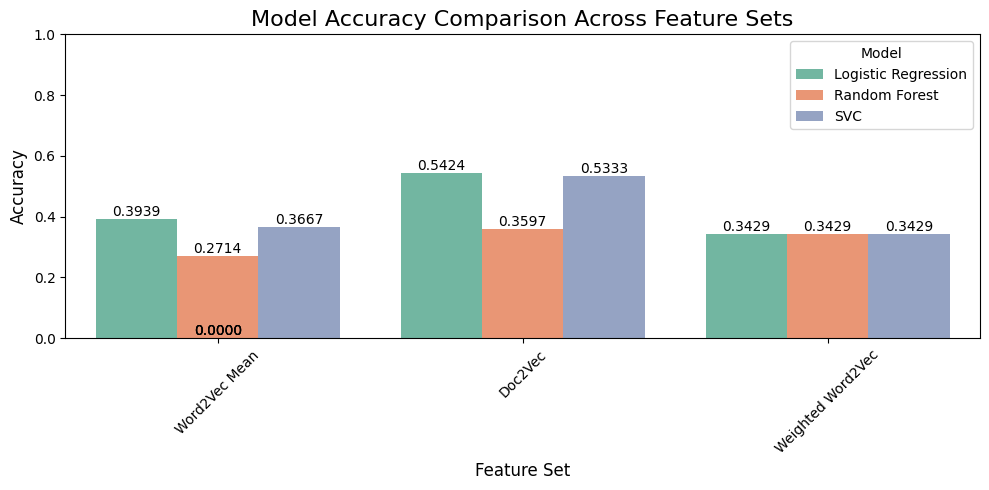

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    data=detailed_df,
    x='Feature Set',
    y='Accuracy',
    hue='Model',
    palette='Set2'
)

# Annotate bars with accuracy values
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(
        f'{height:.4f}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Model Accuracy Comparison Across Feature Sets', fontsize=16)
plt.ylim(0, 1)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Feature Set', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()


### **Choosing Word2vec for Correct Prediction Instances**

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Store CM values here
cm_data = []

for feat_name, X in features.items():
    if feat_name != "Word2Vec Mean":
        continue  # Only for Word2Vec Mean

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)

        for i in range(len(cm)):
            true_positives = cm[i, i]
            predicted_positives = cm[:, i].sum()  # sum of column i
            actual_positives = cm[i].sum()        # sum of row i

            precision = true_positives / predicted_positives if predicted_positives > 0 else 0
            recall = true_positives / actual_positives if actual_positives > 0 else 0

            cm_data.append({
                "Model": model_name,
                "Class": i,
                "Correct Predictions": true_positives,
                "Total Actual": actual_positives,
                "Precision": precision,
                "Recall": recall
            })

# Convert to DataFrame
cm_df = pd.DataFrame(cm_data)


In [105]:
display(cm_df)

,Model,Class,Correct Predictions,Total Actual,Precision,Recall
0,Logistic Regression,0,201,479,0.422269,0.419624
1,Logistic Regression,1,5,224,0.333333,0.022321
2,Logistic Regression,2,2,295,0.333333,0.006780
3,Logistic Regression,3,164,520,0.492492,0.315385
4,Logistic Regression,4,538,792,0.363514,0.679293
5,Random Forest,0,153,479,0.320755,0.319415
6,Random Forest,1,7,224,0.070000,0.031250
7,Random Forest,2,5,295,0.038168,0.016949
8,Random Forest,3,133,520,0.320482,0.255769
9,Random Forest,4,329,792,0.277169,0.415404


### **Bio_ClinicalBERT Results**

In [106]:

data = [
    {"Model": "Bio_Clinical_BERT", "Feature Set": "Fine-Tuned", "Class": 0, "Precision": 0.70, "Recall": 0.86, "F1-score": 0.77, "Support": 506, "Overall Accuracy": 0.6303},
    {"Model": "Bio_Clinical_BERT", "Feature Set": "Fine-Tuned", "Class": 1, "Precision": 0.51, "Recall": 0.74, "F1-score": 0.61, "Support": 239, "Overall Accuracy": 0.6303},
    {"Model": "Bio_Clinical_BERT", "Feature Set": "Fine-Tuned", "Class": 2, "Precision": 0.50, "Recall": 0.71, "F1-score": 0.59, "Support": 308, "Overall Accuracy": 0.6303},
    {"Model": "Bio_Clinical_BERT", "Feature Set": "Fine-Tuned", "Class": 3, "Precision": 0.70, "Recall": 0.80, "F1-score": 0.74, "Support": 488, "Overall Accuracy": 0.6303},
    {"Model": "Bio_Clinical_BERT", "Feature Set": "Fine-Tuned", "Class": 4, "Precision": 0.67, "Recall": 0.31, "F1-score": 0.42, "Support": 769, "Overall Accuracy": 0.6303}
]

bert_df = pd.DataFrame(data)
bert_df['Correct Predictions'] = (bert_df['Recall'] * bert_df['Support']).round().astype(int)
bert_df['Total Actual'] = bert_df['Support']
# fine_tuned_df = bert_df[['Model', 'Class', 'Recall', 'Precision', 'Overall Accuracy', 'Total Actual']]
fine_tuned_df = bert_df[['Model', 'Class', 'Recall', 'Precision', 'Correct Predictions', 'Total Actual']]
print(fine_tuned_df)

               Model  Class  Recall  Precision  Correct Predictions  \
0  Bio_Clinical_BERT      0    0.86       0.70                  435   
1  Bio_Clinical_BERT      1    0.74       0.51                  177   
2  Bio_Clinical_BERT      2    0.71       0.50                  219   
3  Bio_Clinical_BERT      3    0.80       0.70                  390   
4  Bio_Clinical_BERT      4    0.31       0.67                  238   

   Total Actual  
0           506  
1           239  
2           308  
3           488  
4           769  


In [107]:
# combine all for comparison
complete_cm_df = pd.concat([cm_df, fine_tuned_df], ignore_index=True)
display(complete_cm_df)

,Model,Class,Correct Predictions,Total Actual,Precision,Recall
0,Logistic Regression,0,201,479,0.422269,0.419624
1,Logistic Regression,1,5,224,0.333333,0.022321
2,Logistic Regression,2,2,295,0.333333,0.006780
3,Logistic Regression,3,164,520,0.492492,0.315385
4,Logistic Regression,4,538,792,0.363514,0.679293
5,Random Forest,0,153,479,0.320755,0.319415
6,Random Forest,1,7,224,0.070000,0.031250
7,Random Forest,2,5,295,0.038168,0.016949
8,Random Forest,3,133,520,0.320482,0.255769
9,Random Forest,4,329,792,0.277169,0.415404


In [108]:
complete_cm_df.to_csv("cm_data.csv", index=False)


### **Correct Predictions Comparison**

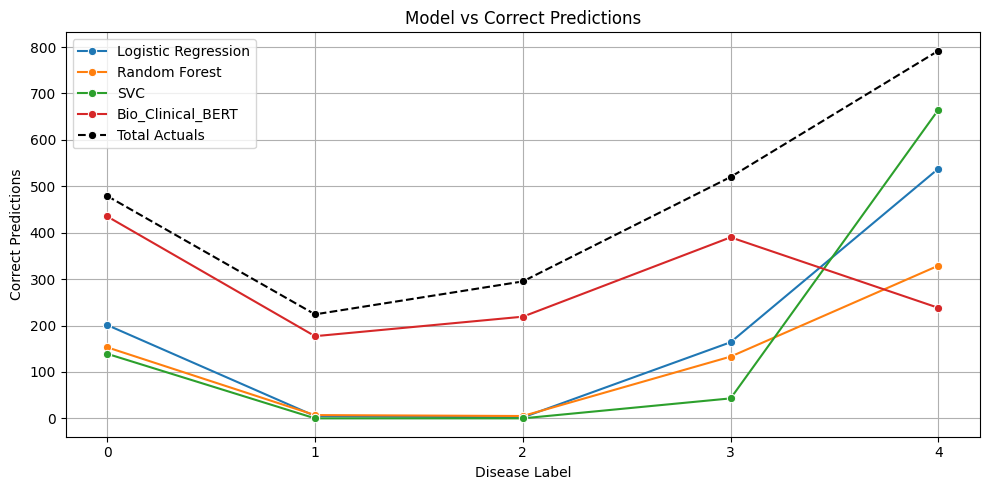

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the Class and Model columns are treated as categorical (string) data
complete_cm_df['Class'] = complete_cm_df['Class'].astype(str)
complete_cm_df['Model'] = complete_cm_df['Model'].astype(str)

all_classes = [0, 1, 2, 3, 4]

plt.figure(figsize=(10, 5))
sns.lineplot(data=complete_cm_df, x="Class", y="Correct Predictions", hue="Model", marker='o')
# Plot Total Actual as a dashed black line
sns.lineplot(
    data=complete_cm_df.drop_duplicates(subset='Class'),
    x="Class",
    y="Total Actual",
    color='black',
    label='Total Actuals',
    linestyle='--',
    marker='o'
)

plt.title("Model vs Correct Predictions")
plt.xlabel("Disease Label")
plt.ylabel("Correct Predictions")


# Fix x-axis to show 0, 1, 2, 3, 4
plt.xticks(all_classes)

plt.grid(True)
plt.tight_layout()
plt.show()


### **Recall Comparison**

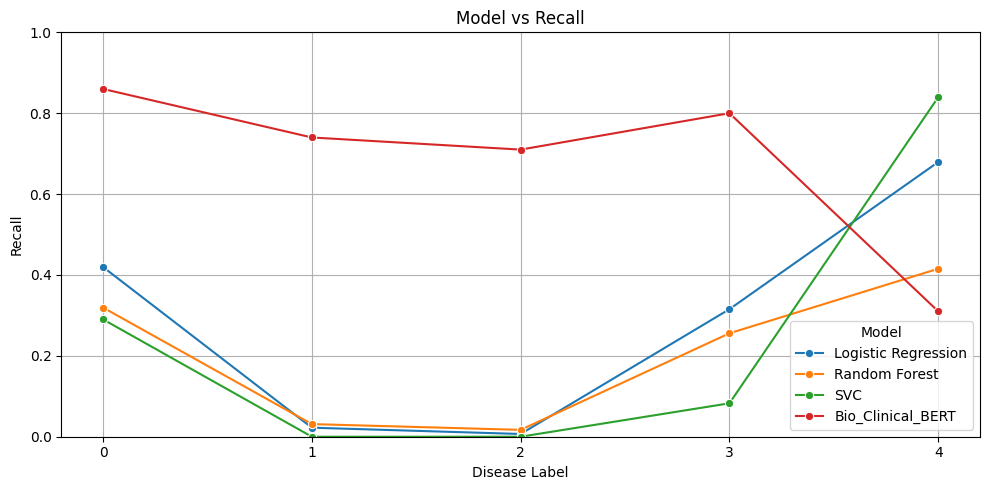

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the Class and Model columns are treated as categorical (string) data
complete_cm_df['Class'] = complete_cm_df['Class'].astype(str)
complete_cm_df['Model'] = complete_cm_df['Model'].astype(str)

all_classes = [0, 1, 2, 3, 4]

plt.figure(figsize=(10, 5))
sns.lineplot(data=complete_cm_df, x="Class", y="Recall", hue="Model", marker='o')

plt.title("Model vs Recall")
plt.xlabel("Disease Label")
plt.ylabel("Recall")

# Set the y-axis limit from 0 to 1
plt.ylim(0, 1)

# Fix x-axis to show 0, 1, 2, 3, 4
plt.xticks(all_classes)

plt.grid(True)
plt.tight_layout()
plt.show()


### **Precision Comparison**

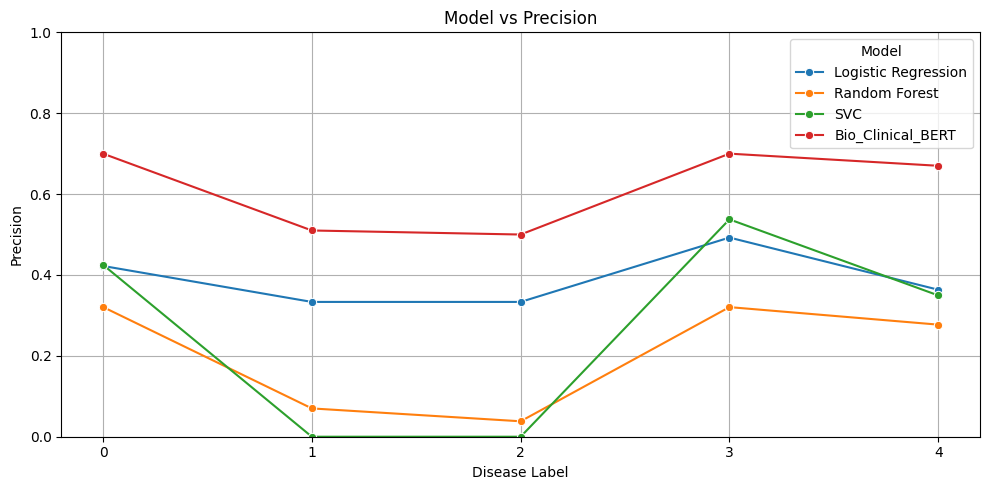

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the Class and Model columns are treated as categorical (string) data
complete_cm_df['Class'] = complete_cm_df['Class'].astype(str)
complete_cm_df['Model'] = complete_cm_df['Model'].astype(str)

all_classes = [0, 1, 2, 3, 4]

plt.figure(figsize=(10, 5))
sns.lineplot(data=complete_cm_df, x="Class", y="Precision", hue="Model", marker='o')

plt.title("Model vs Precision")
plt.xlabel("Disease Label")
plt.ylabel("Precision")
# Set the y-axis limit from 0 to 1
plt.ylim(0, 1)

# Fix x-axis to show 0, 1, 2, 3, 4
plt.xticks(all_classes)
plt.grid(True)
plt.tight_layout()
plt.show()


### **Confusion Matrix Comparison**

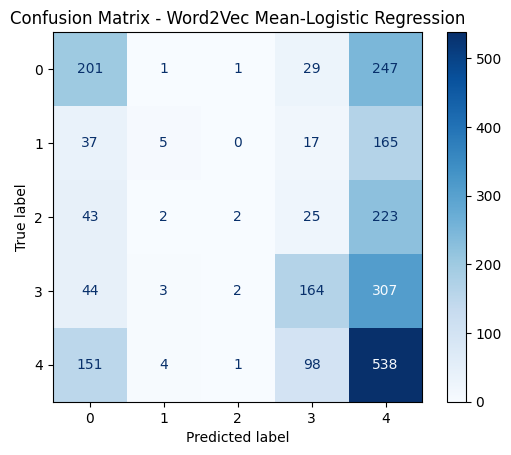

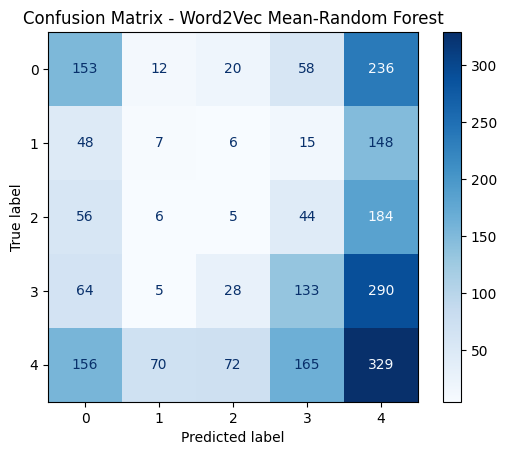

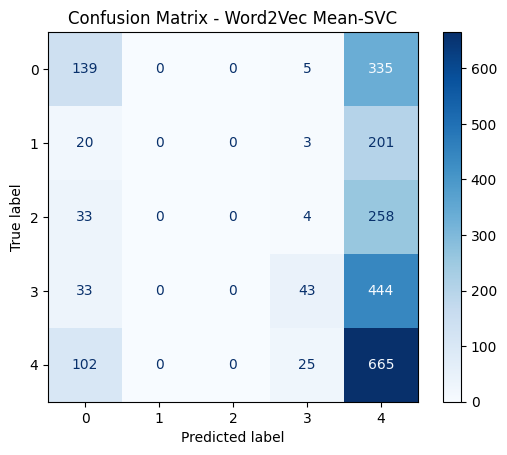

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define models
models = {
    'Logistic Regression': LogisticRegression(C=10, penalty='l2', solver='liblinear', max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(kernel='linear', random_state=42)
}

# Define feature sets
features = {
    'Word2Vec Mean': X_word_emb,
}

# List to collect results
results_detailed = []

for feat_name, X in features.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        # acc = accuracy_score(y_test, y_pred)

        # report = classification_report(y_test, y_pred, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.title(f"Confusion Matrix - {feat_name}-{model_name}")
        plt.show()


### **Bio_ClinicalBERT Confusion Matrix**

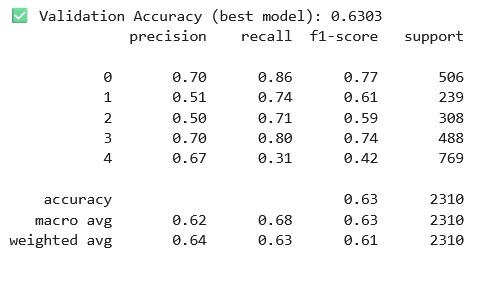